# **DSCI 100 - Individual Project Planning - Natalie Viegas (Section 002)**

# *PART 1: Data Description: A Closer Look at the "Players" Dataset* 


## Loading the "Players" Dataset

In [178]:
#Load library
library (tidyverse)

#URL for dataset

players_url <- "https://raw.githubusercontent.com/natalievioletv/project_planning/main/players.csv"

#Read the data

players <- read_csv (players_url)

#Display the first 6 rows of the data

head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Variables and Observations

In [179]:
#Determine dimensions
row_number <- nrow (players)
column_number <- ncol (players)

row_number
column_number


[1] 196

[1] 7

The data includes details regarding players' characteristics and if they have subscribed to a newsletter. There are 7 variables and 196 observations. 

#### Table 1: Variable Descriptions

| Variable Name | Variable Type | Description                                                         | 
|---------------|---------------|---------------------------------------------------------------------|
|experience     |character      |Player's experience level (Beginner, Amateur, Regular, Veteran, Pro) |
|subscribe      | logical       | Whether the player has subscribed to the newsletter (TRUE or FALSE) |
|hashedEmail    | character     |   Player's identifier                                               |
|played_hours   |  double       | Player's total number of hours played                               |
|name           | character     |   Player's name                                                     |
|gender         |  character    |   Player's gender (Male or Female)                                  |
|Age            |    double     |    Player's age                                                     |

## Summary Statistics

In [180]:
#Summary statistics

players_data_summary <- players |>
summarize (
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median (played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE), 
    max_played_hours = max(played_hours, na.rm = TRUE), 
    mean_age = mean (Age, na.rm = TRUE), 
    median_age = median (Age, na.rm = TRUE), 
    min_age = min (Age, na.rm = TRUE), 
    max_age = max (Age, na.rm = TRUE)
    )
players_data_summary

mean_played_hours,median_played_hours,min_played_hours,max_played_hours,mean_age,median_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,0,223.1,20.52062,19,8,50





#### Table 2: "Players" Dataset - Quantitative Variables' Mean Values

| Variable Name | Mean Value |
|---------------|-----------------|
|played_hours   |5.845918	      |
|age            | 20.52062        | 





### Summary Statistics - Important Findings

The minimum hours played is 0 hours and the maximum is 223.1 hours. The average player plays for 5.845918 hours. 

The youngest player is 8 years old, while the oldest is 50 years old. The average player is 20.52062 years old. 

## Possible Issues with the "Players" Dataset 


### Missing Values

In [181]:
#Determine missing values in dataset

players |> summarize (
experience_missing = sum (is.na (experience)), 
subscribe_missing = sum (is.na (subscribe)), 
hashedEmail_missing = sum (is.na(hashedEmail)), 
played_hours_missing = sum (is.na(played_hours)), 
name_missing = sum (is.na(name)), 
gender_missing = sum (is.na(gender)), 
age_missing = sum (is.na(Age))
                  )


experience_missing,subscribe_missing,hashedEmail_missing,played_hours_missing,name_missing,gender_missing,age_missing
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


### Imbalances

In [182]:

#Check for imbalances in dataset

#Check for imbalance in experience level: experience level distribution 

players |> summarize (
beginners = sum (experience == "Beginner", na.rm = TRUE), 
amateurs = sum (experience == "Amateur", na.rm = TRUE),  
regulars = sum (experience == "Regular", na.rm = TRUE), 
veterans = sum (experience == "Veteran", na.rm = TRUE), 
pros = sum (experience == "Pro", na.rm = TRUE)
    )

#Check for imbalance in subscription: subscription distribution 

players |> summarize (
subscribed_players = sum (subscribe == TRUE, na.rm = TRUE), 
not_subscribed_players = sum (subscribe == FALSE, na.rm = TRUE) 
    )

#Check for gender imbalance in subscription: gender distribution

players |> summarize (
male = sum (gender == "Male", na.rm = TRUE), 
female = sum (gender == "Female", na.rm = TRUE)
    )

beginners,amateurs,regulars,veterans,pros
<int>,<int>,<int>,<int>,<int>
35,63,36,48,14


subscribed_players,not_subscribed_players
<int>,<int>
144,52


male,female
<int>,<int>
124,37


### Possible Issues - Important Findings:

Missing data isn’t an area of significant concern; in the entire dataset, only 2 "Age" values are missing. 

However, there are imbalances in the dataset. A quick look at the data reveals that younger players are represented more than older players. Analysis of the "experience" variable shows that few "pros" are included in the dataset. Additionally, there are more subscribed players than non-subscribed players, and more male than female players. These imbalances might impact future analysis steps. 

Moreover, there are problems with the data collection. For example, players likely self-reported their genders and ages. Self-reporting is often tied to biases. Also, the "played_hours" values were likely tracked via the gaming platform, which may cause inconsistencies. 

# *PART 2: Questions*

## Broad Question

After exploring the data, I have chosen to examine the following: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"


## Specific Question

The project will focus on the following: "Can experience level, age, and hours played predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"

## Tackling the Project with the "Players" Dataset

The "experience" variable will examine how players' gaming experience affects their subscription habits. The "Age" variable will uncover how age impacts subscriptions, while the "played_hours" variable will uncover if gaming time influences players' subscriptions. Crucially, the latter two variables might elucidate how demographics and behavioural traits impact newsletter subscription. 

A few data wrangling steps are necessary. I will change the "experience" and "played_hours" variables to the factor type, using the as_factor() function. I will deal with the 2 missing “Age” values by deletion or imputation (ideally, the latter). 


# *PART 3: Exploratory Data Analysis and Visualization*

## Tidying up the "Players" Dataset

In [183]:


players <- players |> 

drop_na (Age) |> #Remove rows in "Age" column with missing values

mutate(experience = as_factor (experience), subscribe = as_factor (subscribe) ) #Change "experience" and "subscribe" variables to a factor

#Check if the mutation was successful

head (players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Preliminary Data Analysis Using Exploratory Visualizations

### 1. Overall Subscription Rates

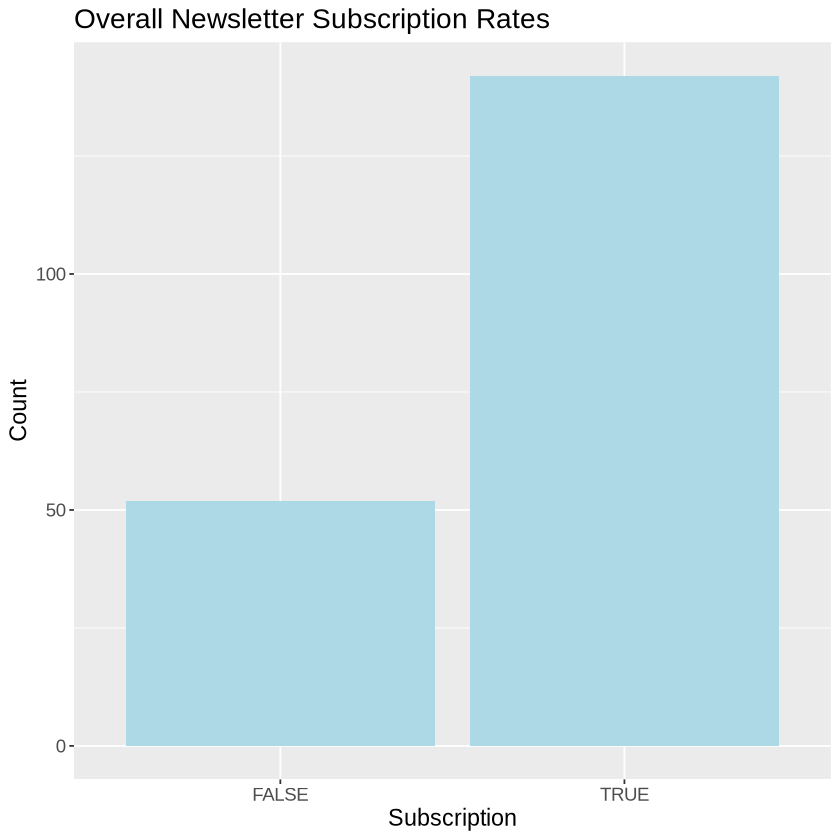

In [184]:
# Visualize overall subscription rates

ggplot (players, aes (x = subscribe)) +
geom_bar (fill = "light blue") +
labs (x = "Subscription", y = "Count") +
ggtitle ("Overall Newsletter Subscription Rates") +
theme (text=element_text (size = 14))

#### General Observations - Overall Subscription Rates  

There are more  subscribers than non-subscribers. 

### 2. Experience and Subscription Rates

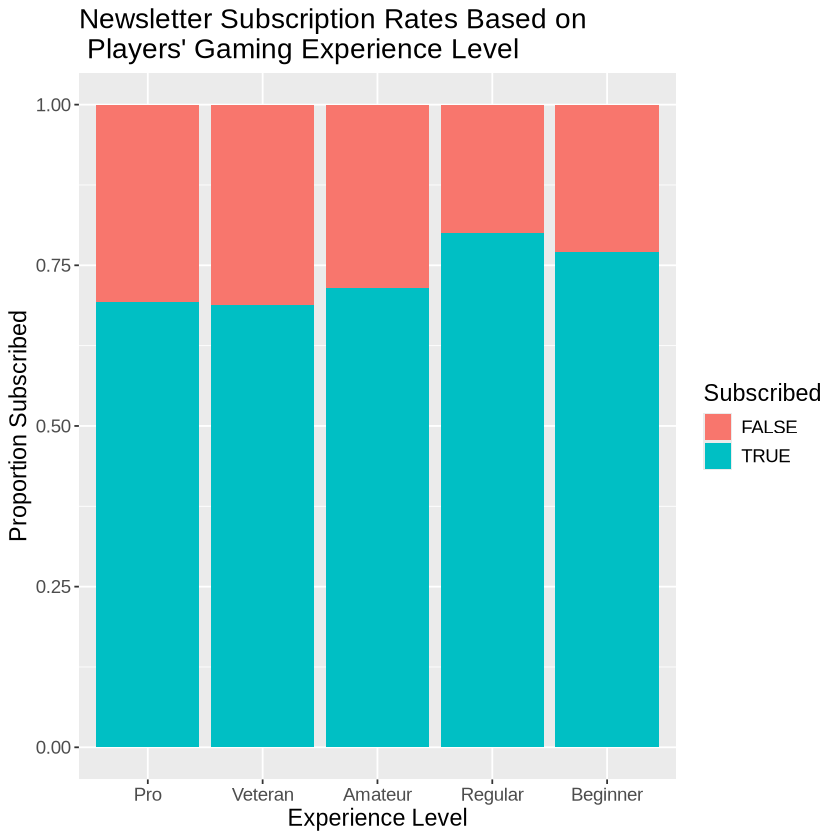

In [185]:
#Visualize subscription rates based on "experience"

ggplot (players, aes (x=experience, fill = subscribe)) +
geom_bar (position = "fill") +
labs (x = "Experience Level", y = "Proportion Subscribed", fill = "Subscribed") +
ggtitle ("Newsletter Subscription Rates Based on \n Players' Gaming Experience Level") +
theme (text=element_text (size = 14))


#### General Observations - Experience and Subscription Rates

There is no apparent relationship between gaming experience level and newsletter subscription rate. 

### 3. Age and Subscription Rates

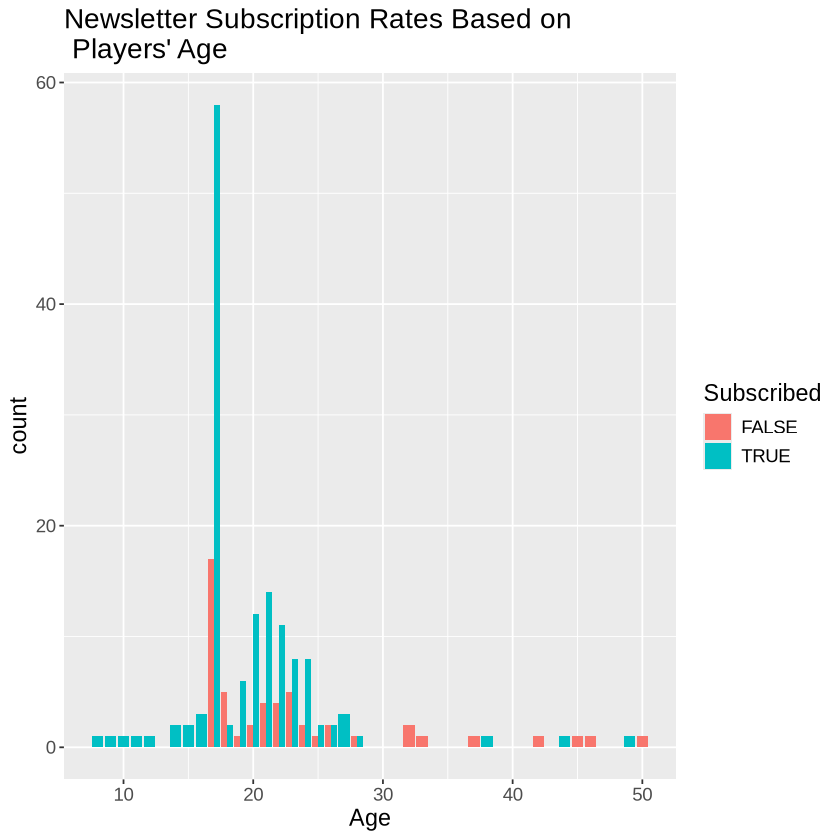

In [186]:
#Visualize subscription rates based on "Age"

ggplot (players, aes (x=Age, fill = as_factor (subscribe)))+
geom_bar (position = "dodge") +
labs (x = "Age", fill = "Subscribed") +
ggtitle ("Newsletter Subscription Rates Based on \n Players' Age") +
theme (text=element_text (size = 14))


#### General Observations - Age and Subscription Rates

Younger players (ie. late teens to early 20s) subscribe more than older players. 

### 4. Played Hours and Subscription Rates

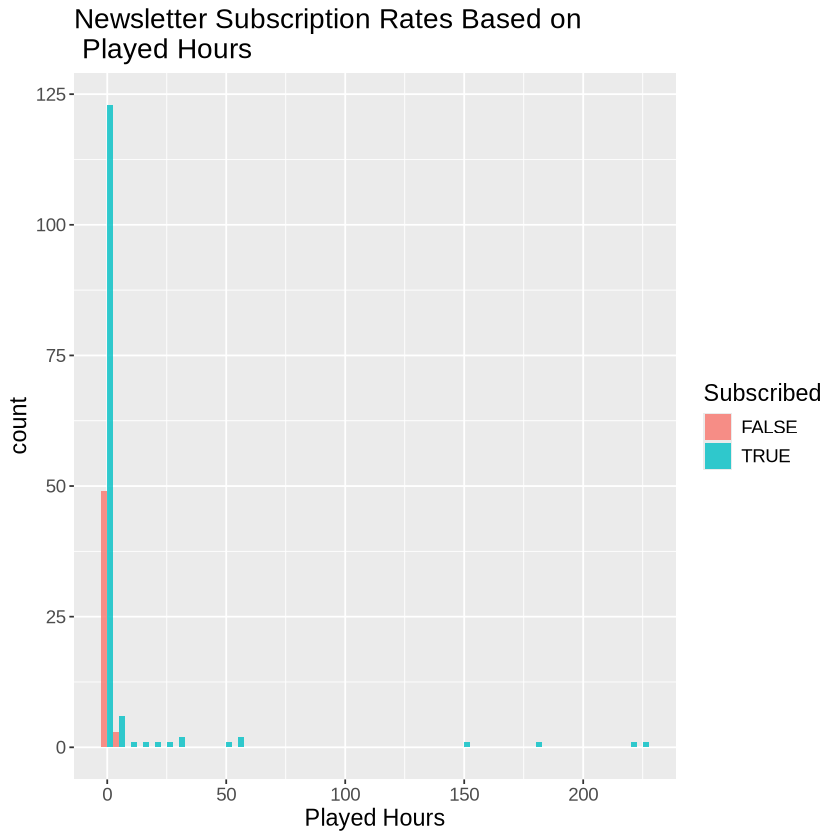

In [187]:
# Visualize subscription rates based on "played_hours"

ggplot (players, aes (x=played_hours, fill = as_factor (subscribe)))+
geom_histogram (binwidth = 5, position = "dodge", alpha = 0.8)+
labs (x = "Played Hours", fill = "Subscribed") +
ggtitle ("Newsletter Subscription Rates Based on \n Played Hours")+
theme (text = element_text (size = 14))


#### General Observations - Played Hours and Subscription Rates

Subscription rates are higher when hours played are lower. 

# *PART 4: Methods and Plan*

## Method Proposal - K-Nearest Neighbors (K-NN) Classification

K-NN classification will be employed to predict if a player's experience, age, and hours played impact newsletter subscription. K-NN is appropriate for classification problems like this one, as we aim to predict a categorical variable's value. Crucially, given my experience in DSCI 100, I am familiar with using this algorithm. 

## Assumptions

K-NN, which uses straight-line distances, assumes scaling of numerical data. The "played_hours" and "age" variables must be scaled. Additionally, to circumvent underfitting and overfitting, the K-value is assumed to be cross-validated and tuned. 

## Potential Limitations 

With more data, K-NN is slower. What's more, imbalanced classes can impact algorithm performance.  

## Comparing, Selecting, and Processing the Model 

Primarily, I will split my data into 75% training and 25% testing. I will then employ 5-fold cross-validation on the training data.

The "experience" and "subscribe" variables will be changed to factors. I will scale "played_hours" and "Age", and manage the missing "Age" values with step_impute_mean(). 

I will tune the model, focusing on accuracy, precision, recall, and confusion matrices. 

Finally, I will evaluate the final model's performance on the 25% test data. 
